# Maths

## Number Theory

When we ever you are tasked with finding a number that always divides two other numbers - check for GCD of the two given numbers.

Total no. of perfect squares upto n is -> sqrt(n). Thus no. of non-perfect squares till n are -> n-sqrt(n)

In [8]:
## GCD of two numbers - Euclidean Algorithm
# GCD of n1 and n2 is the same as GCD of n1 and n2%n1 and so on until the numbers become equal or n2<n1
#LCM *GCD = n1*n2

def gcd(n1, n2):
    if n1 == 0:
        return n2
    return gcd(n2%n1, n1)
gcd(10, 15)

5

In [ ]:
# Check for Prime in O(sqrt(n))
# if i is a factor then n/i is also a factor (if n/i not equal to i)
import math
def isprime(n):
    if n<=1:
          return False
    for i in range(2,int(math.sqrt(n)+1)):
         if n%i==0:
              return False
    return True

print(isprime(37))

In [10]:
# Find prime factors of a number in O(sqrt(n)*logn)
import math
def factors(n):
    lst=[]
    for i in range(2,int(math.sqrt(n))):
        while(n%i==0):
            lst.append(i)
            n=n/i
    if n!=1:
        lst.append(n)
    return lst

lst=factors(60)
print('prime factors=',lst)

prime factors= [2, 2, 3, 5]


In [9]:
# Sieve of Eratosthenes - Find all prime numbers upto n
# pre compute whether a number is prime or not and store in a list
def sieve(n):
    prime=[1]*(n+1)
    for i in range(2,int(math.sqrt(n))+1): # run loop till sqrt(n)
        if prime[i]==1:
            for j in range(i*i,n+1,i): # start from i*i instead of 2*i
                prime[j]=0
    # here if prime[i]==1 then i is prime
    for i in range(2,n+1):
        if prime[i]==1:
            print(i,end=' ')
sieve(30)    
# TC=O(nloglogn)- for precomputation

2 3 5 7 11 13 17 19 23 29 

In [ ]:
# Count number of primes in range L->R

def countPrimes(l,r):
    prime=sieve(r)
    count=0
    for i in range(r+1):
        if prime[i]==1:
            count+=1
            prime[i]=count
    # using prefix sums we can say number of primes in range l->r is prime[r]-prime[l-1]
    return prime[r]-prime[l-1]

In [3]:
# Find smallest prime factor that divides a given number
import math
def smallestPrimeFactor(n):
    prime=[1]*(n+1)
    for i in range(2,int(math.sqrt(n))+1):
        if prime[i]==1:
            for j in range(i*i,n+1,i):
                prime[j]=0
            if prime[n]==0:
                return i
    return n
smallestPrimeFactor(37)

37

In [7]:
# Power Exponentiation in O(logn)

def pow(x,n):
    ans=1
    while n>0:
        if n%2!=0:
            ans=ans*x
            n-=1
        else:
            n=n//2
            x=x*x
    return ans
pow(3,4)

81

In [ ]:
# how to express a number in terms of powers of another number along with coefficients
# eg 5= (1)2^2 +(1)2^0
# sum of coefficients=1+1=2

import math
def sum_of_coefficients(n, k):
    exponent=math.floor(math.log(n,k))
    coefficients=0
    while n > 0: 
        coefficients+=n//(k**exponent)
        n = n % (k**exponent)
        exponent-=1
    return coefficients
sum_of_coefficients(6492,10)

In [ ]:
# Codeforces 1765M
# find the minimum LCM of two numbers a,b such that a+b=n
import math
def leastLCM(n):
    a=1
    for i in range(2,int(math.sqrt(n))+1):
        if n%i==0:
            a=n//i
            break
    return a,n-a

t=int(input())
for _ in range(t):
    n=int(input())
    print(leastLCM(n)[0],leastLCM(n)[1])

In [ ]:
# find out if a number is of the form A*x +B*y=n where A,B are constants
# eg: 4x+7y=n
def lucky(n):
    # Start with the maximum possible number of 7s
    num_sevens = n // 7
    while num_sevens >= 0:
        remaining = n - 7 * num_sevens
        if remaining % 4 == 0:  # if remaining is divisible by 4 
            num_fours = remaining // 4
            return '4' * num_fours + '7' * num_sevens
        num_sevens -= 1
    return -1
n = int(input())
print(lucky(n))


In [ ]:
# distribute a given number into groups such that sum of sqaure of each element of group is minimum
# eg distribute 10 into 4 groups -->[3,3,2,2] so 3^2+3^2+2^2+2^2 is minimum
def distribute(n,m):
    # take n%m elements as [n/m]+1
    # take remaining elements as [n/m]
    arr=[n//m]*m
    for i in range(n%m):
        arr[i]=n//m+1
    return arr
print(distribute(7,4))

In [ ]:
# find how far away a number is from the closest multiple of the base
def closest_multiple(x,z):
    distance_from_previous_closest_multiple=x%z
    distance_from_next_closest_multiple=z-x%z
    print(distance_from_previous_closest_multiple,distance_from_next_closest_multiple)
closest_multiple(13,6)

1 5


## Combinatorics

In [3]:
# Calculate nCk (binomial coeffiecnt)
# useful when you have to choose k elements from a set of n 
def nCk(n, k):
    if k > n:
        return 0
    if k == 0 or k == n:
        return 1
    res = 1
    for i in range(k):
        res = res * (n-i)//(i+1)
    return res
nCk(5,2)

10

This formula can be used to calculate all the binomial coefficients from the previous one in constant time

nC0=1, hence we can calculate nC1 and from there on we can calculate the rest 

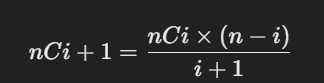

In [9]:
# sum of binomial coefficients nC0+nC1...nC(k) can be written using the above formula 
def sum_nCk(n,k):
    sum=1
    current=1 #nC0
    for i in range(1,k+1):
        current=current*(n-i+1)//(i)
        sum+=current
    return sum
sum_nCk(5,3)


16

Divisibility of 7

In [ ]:
# Input : 8955795758
# Output : Divisible by 7
#        Explanation:
#        We express the number in terms of triplets 
#        of digits as follows.
#                 (008)(955)(795)(758)
#        Now, 758- 795 + 955 - 8 = 910, which is 
#        divisible by 7